<a href="https://colab.research.google.com/github/Lucas01iveira/metodos-em-fisica-computacional/blob/main/Modelo_de_Ising_1d_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def calcula_E(j, h, config):
  N = len(config)
  soma_j = 0
  soma_h = 0

  for i in range(N-1):
    soma_j += config[i]*config[i+1]
  soma_j += config[N-1]*config[0] # termo da condição de contorno

  for i in range(N):
    soma_h += config[i]
  
  E = - j*soma_j - h*soma_h

  return E

def calcula_P(E_flip, T):
  return np.exp(-E_flip/T)

# Defino uma função para atualizar a configuração de spins dados os parâmetros j, h e T
def atualiza_config(j, h, T, config):
  N = len(config)

  # calculo a energia inicial
  E_0 = calcula_E(j, h, config) # aqui tanto faz usar config ou aux

  for i in range(N): # faço uma varredura no vetor de configurações
    aux = np.zeros(N) # defino um vetor auxiliar
    aux = np.copy(config)

    aux[i] = aux[i]*(-1) # troco o sinal do vetor auxiliar
    E_new = calcula_E(j, h, aux) # calculo a energia do novo estado gerado
    E_flip = E_new - E_0 # verifico a variação de energia associada

    if E_flip < 0: # se a variação de energia for negativa, faço a alteração no vetor original
      config[i] = config[i]*(-1)
    
    else: # se não for, aplico o cálculo da probabilidade
      P_flip = calcula_P(E_flip, T)
      r = np.random.uniform(0,1)

      if r < P_flip: # se r < P_flip, flipo o spin
        config[i] = config[i]*(-1)
      # do contrário, não faço nada

In [ ]:
# testo a função calcula E
teste = [1,1,1]
print(calcula_E(1,1,teste))

-6


In [ ]:
# teste da função atualiza_config
config0 = [1,-1,-1,-1]
for i in range(10):
  print(config0)
  atualiza_config(1,1,1,config0) # j = h = T = 1

[1, -1, -1, -1]
[-1, 1, 1, 1]
[1, -1, 1, 1]
[1, 1, -1, -1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]


In [ ]:
# faço o plot para uma determinada temperatura e Nvar varreduras
Nvar = 1000 # número de varreduras
N = 10 # número de spins
j = 1 # parâmetro de energia
h = np.arange(-1,1.2,0.2) # array de parâmetros do campo magnético
print(h)
T = 1 # temperatura 
m = [] # vetor para guardar a magnetização média do cálculo efetuado para cada campo magnético

for i in range(len(h)): # para cada campo magnético
  config0 = np.random.choice([-1,1], N) # defino uma configuração inicial
  m_aux = [] # vetor auxiliar (guarda a magnetização de cada varredura)

  for k in range(Nvar): # para cada varredura
    m_i = np.mean(config0) # calculo a magnetização do estado associado
    m_aux.append(m_i) # armazeno no vetor auxiliar
    if h[i] == -1:
      print(config0)
    atualiza_config(j, h[i], T, config0) # atualizo a configuração de spins
  
  # ao final das Nvar varreduras, guardo a média de todas as magnetizações em m
  print('h = ', h[i], 'last m =', m_aux[-1],'size m_aux', len(m_aux))
  print(config0)
  m.append(np.mean(m_aux))

plt.plot(h,m) # ploto a magnetização média associada a cada parâmetro h utilizado 

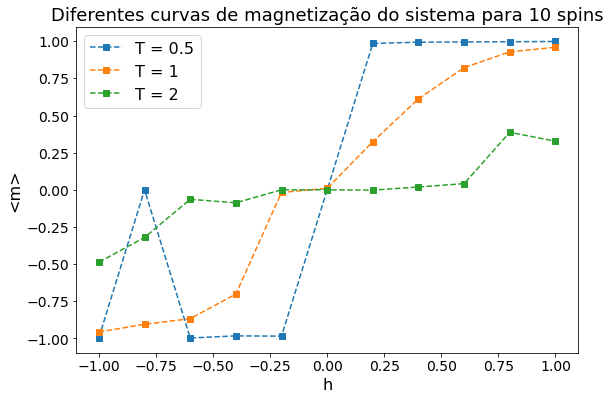

In [ ]:
# faço o plot para uma determinada temperatura e Nvar varreduras
Nvar = 1000 # número de varreduras
N = 10 # número de spins
j = 1 # parâmetro de energia
h = np.arange(-1,1.2,0.2) # array de parâmetros do campo magnético
T = [0.5,1,2] # temperatura 

ax = plt.figure(figsize=(9,6))

for l in range(len(T)): # para cada temperatura
  m = [] # defino um vetor para guardar a magnetização média do cálculo efetuado para cada campo magnético

  for i in range(len(h)): # para cada campo magnético
    config0 = np.random.choice([-1,1], N) # defino uma configuração inicial
    m_aux = [] # vetor auxiliar (guarda a magnetização de cada varredura)

    for k in range(Nvar): # para cada varredura
      m_i = np.mean(config0) # calculo a magnetização do estado associado
      m_aux.append(m_i) # armazeno no vetor auxiliar
      atualiza_config(j, h[i], T[l], config0) # atualizo a configuração de spins
  
    # ao final das Nvar varreduras, guardo a média de todas as magnetizações em m
    m.append(np.mean(m_aux))

  ax = plt.plot(h,m, label='T = {}'.format(T[l]), marker='s', linestyle='dashed') # ploto a magnetização média em função de h, para a temperatura T associada 

plt.title('Diferentes curvas de magnetização do sistema para {} spins'.format(N), fontsize=18)
plt.ylabel('<m>', fontsize=16)
plt.xlabel('h', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16)
plt.show()

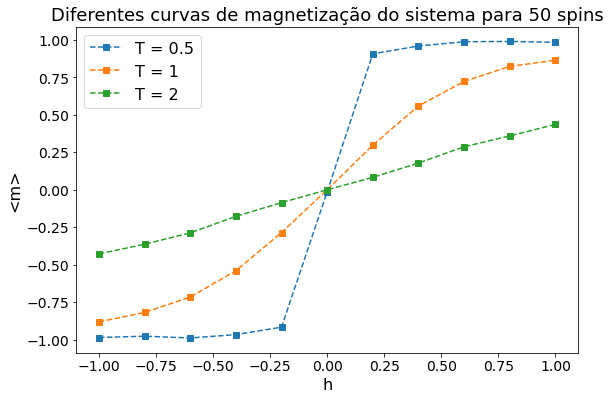

In [ ]:
# faço o plot para uma determinada temperatura e Nvar varreduras
Nvar = 1000 # número de varreduras
N = 50 # número de spins
j = 1 # parâmetro de energia
h = np.arange(-1,1.2,0.2) # array de parâmetros do campo magnético
T = [0.5,1,2] # temperatura 

ax = plt.figure(figsize=(9,6))

for l in range(len(T)): # para cada temperatura
  m = [] # defino um vetor para guardar a magnetização média do cálculo efetuado para cada campo magnético

  for i in range(len(h)): # para cada campo magnético
    config0 = np.random.choice([-1,1], N) # defino uma configuração inicial
    m_aux = [] # vetor auxiliar (guarda a magnetização de cada varredura)

    for k in range(Nvar): # para cada varredura
      m_i = np.mean(config0) # calculo a magnetização do estado associado
      m_aux.append(m_i) # armazeno no vetor auxiliar
      atualiza_config(j, h[i], T[l], config0) # atualizo a configuração de spins
  
    # ao final das Nvar varreduras, guardo a média de todas as magnetizações em m
    m.append(np.mean(m_aux))

  ax = plt.plot(h,m, label='T = {}'.format(T[l]), marker='s', linestyle='dashed') # ploto a magnetização média em função de h, para a temperatura T associada 

plt.title('Diferentes curvas de magnetização do sistema para {} spins'.format(N), fontsize=18)
plt.ylabel('<m>', fontsize=16)
plt.xlabel('h', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16)
plt.show()